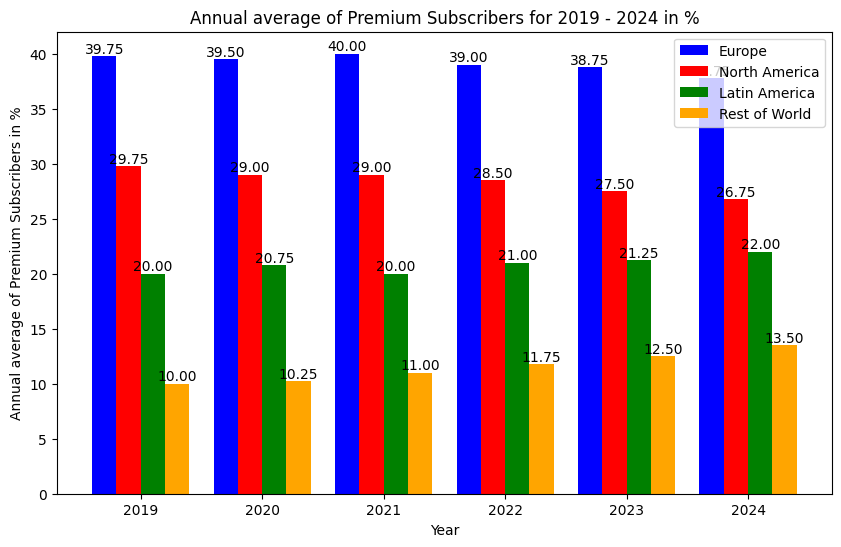

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read CSV file & analyze
new_file_path = "Premium Subscribers ALL.csv"

# Read content of the file
with open(new_file_path, "r", encoding="utf-8") as file:
    content = file.readlines()

# Read data from the file
data = {}
current_year = None

for line in content[1:]:  # Skip header
    line = line.strip()
    if not line:
        continue
    
    if line.endswith(":"):  # Year
        current_year = line.replace(":", "").strip()
        data[current_year] = {}
    elif "=" in line:
        region, value = line.split("=")
        data[current_year][region.strip()] = float(value.strip())

# Convert data to DataFrame
df_new = pd.DataFrame.from_dict(data, orient="index")
df_new = df_new.sort_index(ascending=True)

# Extract data for plotting
years = df_new.index.astype(str)
regions = df_new.columns
values = df_new.values

# Colors for regions
colors = {
    "Europe": "blue",
    "North America": "red",
    "Latin America": "green",
    "Rest of World": "orange"
}

# Calculate the position of groups
x = np.arange(len(years))  # Position for years
width = 0.2  # Width of the bars

# Create diagram
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each region
for i, region in enumerate(regions):
    bars = ax.bar(x + (i - 1.5) * width, values[:, i], width, label=region, color=colors[region])
    
    # Add values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Add labels, titles, and legend
ax.set_xlabel("Year")
ax.set_ylabel("Annual average of Premium Subscribers in %")
ax.set_title("Annual average of Premium Subscribers for 2019 - 2024 in %")
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Show the diagram
plt.show()
